# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [61]:
# Set current amount of crypto assets
stocks = [
  {'symbol': 'PYPL', 'shares': 10},
  {'symbol': 'COIN', 'shares': 10},
  {'symbol': 'BBAI', 'shares': 50},
  {'symbol': 'STEM', 'shares': 10},
  {'symbol': 'LUNA', 'shares': 10},
  {'symbol': 'INFY', 'shares': 5},
  {'symbol': 'NMTC', 'shares': 250},
    ]

In [46]:
# Alpaca API URLs
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2",
    base_url='https://paper-api.alpaca.markets'
)

### Fetch current Stock prices

In [72]:
# Create an empty DataFrame to store the portfolio information
portfolio_data = []

# Create the DataFrame with column names
portfolio_df = pd.DataFrame(columns=['Symbol', 'Shares', 'Current Price', 'Current Value'])

# Fetch the current prices for each stock, calculate the value, and add data to the DataFrame
for stock in stocks:
    symbol = stock['symbol']
    shares = stock['shares']
    current_price = api.get_latest_trade(symbol=symbol).price
    current_value = current_price * shares
    portfolio_data.append([symbol, shares, current_price, current_value])

# Add the data to the DataFrame
portfolio_df = portfolio_df.append(pd.DataFrame(portfolio_data, columns=portfolio_df.columns))
portfolio_df.set_index('Symbol', inplace=True)

# Preview current value of my stocks
portfolio_df

,Shares,Current Price,Current Value
Symbol,,,
PYPL,10,50.370,503.70
COIN,10,70.760,707.60
BBAI,50,1.240,62.00
STEM,10,3.040,30.40
LUNA,10,5.520,55.20
INFY,5,16.450,82.25
NMTC,250,1.005,251.25


### Calculate the total portfolio value

In [82]:
# Calculate the total portfolio value
total_value = portfolio_df['Current Value'].sum()
print(f'Total Portfolio Value: ${total_value:.2f}')

# Print current stock balance

for stock in stocks:
    symbol = stock['symbol']
    shares = stock['shares']
    current_price = portfolio_df.loc[symbol, 'Current Price']
    current_value = current_price * shares
    print(f"The current value of your {shares} shares of {symbol} is ${current_value:.2f}")

Total Portfolio Value: $1692.40
The current value of your 10 shares of PYPL is $503.70
The current value of your 10 shares of COIN is $707.60
The current value of your 50 shares of BBAI is $62.00
The current value of your 10 shares of STEM is $30.40
The current value of your 10 shares of LUNA is $55.20
The current value of your 5 shares of INFY is $82.25
The current value of your 250 shares of NMTC is $251.25


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [83]:
# Set current amount of shares
agg = 200
spy = 50

In [85]:
# Alpaca API URLs
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2",
    base_url='https://paper-api.alpaca.markets'
)

In [97]:
# Format current date as ISO format
today = pd.Timestamp("2023-10-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio.head()

AGG                                              \
                           close     high    low trade_count   open   volume   
timestamp                                                                      
2023-10-27 04:00:00+00:00  92.59  92.6405  92.37       23095  92.56  7636247   

                                         SPY                             \
                                vwap   close   high     low trade_count   
timestamp                                                                 
2023-10-27 04:00:00+00:00  92.523424  410.68  414.6  409.21      792070   

                                                          
                             open     volume        vwap  
timestamp                                                 
2023-10-27 04:00:00+00:00  414.19  106362433  411.582842

In [102]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_portfolio['AGG']['close'].values[0]
spy_close_price = df_portfolio['SPY']['close'].values[0]
# Print AGG and SPY close prices
display(f"Current AGG closing price: ${agg_close_price}")
display(f"Current SPY closing price: ${spy_close_price}")

'Current AGG closing price: $92.59'

'Current SPY closing price: $410.68'

In [103]:
agg_close_price

92.59

In [105]:
# Compute the current value of shares
my_spy_value = spy_close_price * spy
my_agg_value = agg_close_price * agg
# Print current value of shares
print(f"The current value of your {spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20534.00
The current value of your 200 AGG shares is $18518.00


### Savings Health Analysis

In [112]:
# Set monthly household income
monthly_income = 5000

# Consolidate financial assets data
# YOUR CODE 
assets = {
    'Savings Account': 1000,
    'Crypto Account': 2500,
    'Investment Account': 1500,
    'Retirement Account' : 10000
}

# Create savings DataFrame
df_savings = pd.DataFrame(assets, index=['Amount'])
# Display savings DataFrame
display(df_savings)

,Savings Account,Crypto Account,Investment Account,Retirement Account
Amount,1000,2500,1500,10000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

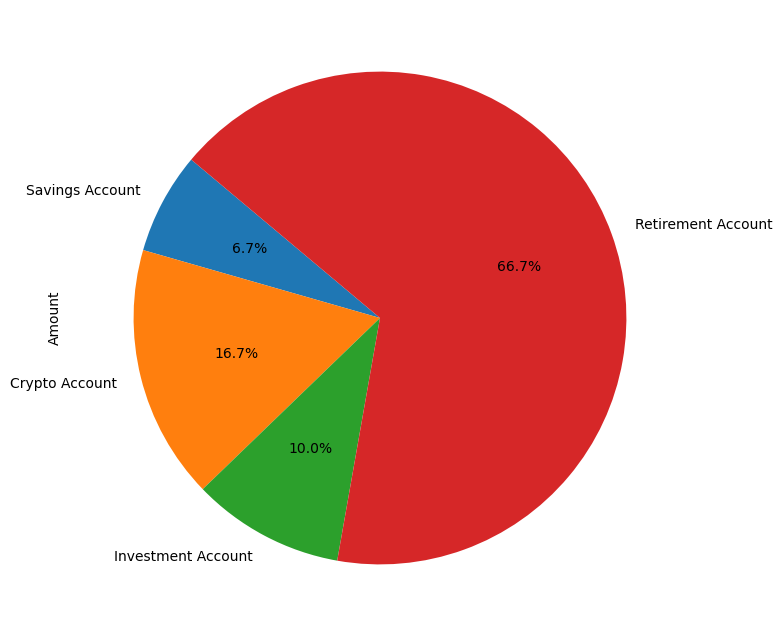

In [119]:
# Plot savings pie chart
df_savings.T.plot.pie(subplots=True, autopct='%1.1f%%', startangle=140, figsize=(8, 8), legend=False)

In [120]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.loc['Amount'].sum()
# Validate saving health
if total_savings >= emergency_fund:
    print(f"Congratulations! Your savings of ${total_savings:.2f} are more than your ideal emergency fund of ${emergency_fund:.2f}.")
else:
    shortfall = emergency_fund - total_savings
    print(f"Your savings of ${total_savings:.2f} are ${shortfall:.2f} short of your ideal emergency fund of ${emergency_fund:.2f}.")

Congratulations! Your savings of $15000.00 are more than your ideal emergency fund of $15000.00.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [124]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [151]:
# Get 5 years' worth of historical data for PYPL, COIN, BBAI, STEM, INFY, and NMTC
start_date = pd.Timestamp("2018-10-27", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-10-27", tz="America/New_York").isoformat()

am_tickers = ["PYPL", "COIN", "BBAI", "STEM", "INFY", "NMTC"]

am_tickers = api.get_bars(
    am_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

display(am_tickers.head())
display(am_tickers.tail())

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2019-11-26 05:00:00+00:00,11.15,11.15,11.15,0,11.15,0,0.0,BBAI
2019-11-27 05:00:00+00:00,11.15,11.15,11.15,0,11.15,0,0.0,BBAI
2019-11-29 05:00:00+00:00,11.15,11.15,11.15,0,11.15,0,0.0,BBAI
2019-12-02 05:00:00+00:00,11.15,11.15,11.15,0,11.15,0,0.0,BBAI
2019-12-03 05:00:00+00:00,11.15,11.15,11.15,0,11.15,0,0.0,BBAI


,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-10-23 04:00:00+00:00,3.38,3.53,3.1803,19831,3.32,3693803,3.408698,STEM
2023-10-24 04:00:00+00:00,3.32,3.58,3.3000,20787,3.44,3845913,3.391223,STEM
2023-10-25 04:00:00+00:00,3.17,3.32,3.1600,19155,3.30,3667609,3.206732,STEM
2023-10-26 04:00:00+00:00,3.24,3.39,3.1100,21718,3.24,4662798,3.213069,STEM
2023-10-27 04:00:00+00:00,3.04,3.35,3.0000,20043,3.35,4372068,3.087134,STEM


In [152]:
# Reorganize the DataFrame
# Separate ticker data
PYPL = am_tickers[am_tickers["symbol"] == "PYPL"].drop("symbol", axis=1)
COIN = am_tickers[am_tickers["symbol"] == "COIN"].drop("symbol", axis=1)
BBAI = am_tickers[am_tickers["symbol"] == "BBAI"].drop("symbol", axis=1)
STEM = am_tickers[am_tickers["symbol"] == "STEM"].drop("symbol", axis=1)
INFY = am_tickers[am_tickers["symbol"] == "INFY"].drop("symbol", axis=1)
NMTC = am_tickers[am_tickers["symbol"] == "NMTC"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
am_tickers = pd.concat([PYPL, COIN, BBAI, STEM, INFY, NMTC], axis=1, keys=["PYPL", "COIN", "BBAI", "STEM", "INFY", "NMTC"])
# Display sample data
am_tickers.head()

PYPL                                              \
                           close    high    low trade_count   open    volume   
timestamp                                                                      
2018-10-29 04:00:00+00:00  81.15  85.240  78.99      106839  84.74  13714419   
2018-10-30 04:00:00+00:00  80.90  81.960  79.42      100903  80.33  14031903   
2018-10-31 04:00:00+00:00  84.19  85.350  82.30       83336  82.37  12661127   
2018-11-01 04:00:00+00:00  85.04  85.150  83.57       52818  84.18   6564833   
2018-11-02 04:00:00+00:00  83.51  86.104  82.65       55163  85.46   7930288   

                                      COIN           ...  INFY            \
                                vwap close high low  ...  open    volume   
timestamp                                            ...                   
2018-10-29 04:00:00+00:00  81.979991   NaN  NaN NaN  ...  9.08   9951615   
2018-10-30 04:00:00+00:00  80.721347   NaN  NaN NaN  ...  9.16  13777437   
2018-10-31 04:00:00+00:00  84.270004   NaN  NaN NaN  ...  9.45   9743158   
2018-11-01 04:00:00+00:00  84.765630   NaN  NaN NaN  ...  9.39  13365047   
2018-11-02 04:00:00+00:00  83.846394   NaN  NaN NaN  ...  9.32   8800672   

                                     NMTC                                   \
                               vwap close high low trade_count open volume   
timestamp                                                                    
2018-10-29 04:00:00+00:00  8.996067   NaN  NaN NaN         NaN  NaN    NaN   
2018-10-30 04:00:00+00:00  9.190746   NaN  NaN NaN         NaN  NaN    NaN   
2018-10-31 04:00:00+00:00  9.480674   NaN  NaN NaN         NaN  NaN    NaN   
2018-11-01 04:00:00+00:00  9.291341   NaN  NaN NaN         NaN  NaN    NaN   
2018-11-02 04:00:00+00:00  9.302232   NaN  NaN NaN         NaN  NaN    NaN   

                                
                          vwap  
timestamp                       
2018-10-29 04:00:00+00:00  NaN  
2018-10-30 04:00:00+00:00  NaN  
2018-10-31 04:00:00+00:00  NaN  
2018-11-01 04:00:00+00:00  NaN  
2018-11-02 04:00:00+00:00  NaN  

[5 rows x 42 columns]

In [166]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = am_tickers,
    weights = [.16,.20,.16,.16,.16,.16],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [167]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

PYPL                                              \
                           close    high    low trade_count   open    volume   
timestamp                                                                      
2018-10-29 04:00:00+00:00  81.15  85.240  78.99      106839  84.74  13714419   
2018-10-30 04:00:00+00:00  80.90  81.960  79.42      100903  80.33  14031903   
2018-10-31 04:00:00+00:00  84.19  85.350  82.30       83336  82.37  12661127   
2018-11-01 04:00:00+00:00  85.04  85.150  83.57       52818  84.18   6564833   
2018-11-02 04:00:00+00:00  83.51  86.104  82.65       55163  85.46   7930288   

                                                   COIN       ...      INFY  \
                                vwap daily_return close high  ...      vwap   
timestamp                                                     ...             
2018-10-29 04:00:00+00:00  81.979991          NaN   NaN  NaN  ...  8.996067   
2018-10-30 04:00:00+00:00  80.721347    -0.003081   NaN  NaN  ...  9.190746   
2018-10-31 04:00:00+00:00  84.270004     0.040667   NaN  NaN  ...  9.480674   
2018-11-01 04:00:00+00:00  84.765630     0.010096   NaN  NaN  ...  9.291341   
2018-11-02 04:00:00+00:00  83.846394    -0.017992   NaN  NaN  ...  9.302232   

                                        NMTC                                   \
                          daily_return close high low trade_count open volume   
timestamp                                                                       
2018-10-29 04:00:00+00:00          NaN   NaN  NaN NaN         NaN  NaN    NaN   
2018-10-30 04:00:00+00:00     0.024526   NaN  NaN NaN         NaN  NaN    NaN   
2018-10-31 04:00:00+00:00     0.030468   NaN  NaN NaN         NaN  NaN    NaN   
2018-11-01 04:00:00+00:00    -0.017951   NaN  NaN NaN         NaN  NaN    NaN   
2018-11-02 04:00:00+00:00    -0.005376   NaN  NaN NaN         NaN  NaN    NaN   

                                             
                          vwap daily_return  
timestamp                                    
2018-10-29 04:00:00+00:00  NaN          NaN  
2018-10-30 04:00:00+00:00  NaN          NaN  
2018-10-31 04:00:00+00:00  NaN          NaN  
2018-11-01 04:00:00+00:00  NaN          NaN  
2018-11-02 04:00:00+00:00  NaN          NaN  

[5 rows x 48 columns]

In [168]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\amanl\Desktop\FinTech\Module-5-Challenge-Financial-Planner\Resources\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998620,1.005714,0.972811,1.023682,1.007021,1.035695,1.019093,1.007575,0.982919,0.976586,...,1.034062,1.002646,1.000903,1.011992,1.021854,0.990985,0.994607,0.993793,0.972170,1.021059
2,0.979547,1.031314,0.913344,1.010394,1.002645,1.044368,1.051513,0.970083,0.976285,0.957831,...,1.027983,1.014462,1.044667,1.020292,1.027727,1.016614,1.006648,0.950821,0.972732,1.053019
3,0.991459,1.059977,0.943521,1.033165,1.007812,1.039387,1.064478,0.958217,0.971302,0.947998,...,1.031303,1.003077,1.053489,1.067494,1.020127,1.025626,0.989995,0.954200,0.977352,1.074329
4,0.998593,1.095408,0.966422,0.990578,1.041166,1.057201,1.085790,0.955166,0.980506,0.948026,...,1.013575,0.999391,1.111263,1.077515,1.055011,1.028464,0.969211,0.955919,1.034634,1.057934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.203591,0.379408,1.269865,1.509917,2.031148,2.472861,2.539621,0.754493,0.960602,0.819815,...,0.285363,0.415397,0.353133,2.898857,0.085323,0.330149,1.118476,0.214141,0.791027,1.903883
1257,0.197575,0.381065,1.265900,1.541414,1.981955,2.452330,2.440110,0.773732,0.969873,0.807214,...,0.272865,0.412042,0.370884,2.786935,0.085518,0.313766,1.076542,0.214358,0.780448,1.966103
1258,0.186647,0.380149,1.267944,1.491780,2.008867,2.407068,2.513358,0.777122,0.989174,0.807877,...,0.275765,0.414750,0.381746,2.674277,0.088263,0.309421,1.116084,0.212044,0.757406,2.017939
1259,0.194913,0.385239,1.250680,1.489552,2.107351,2.454790,2.586060,0.785502,0.980827,0.841255,...,0.282958,0.415679,0.368707,2.625085,0.087485,0.326724,1.079153,0.194414,0.770205,2.001019


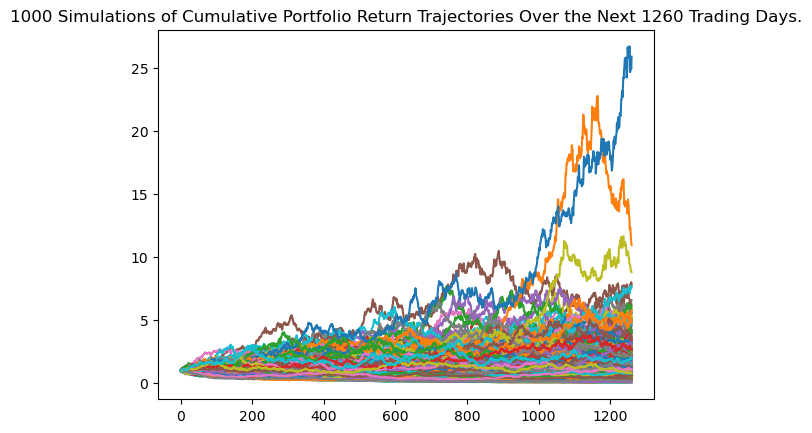

In [169]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

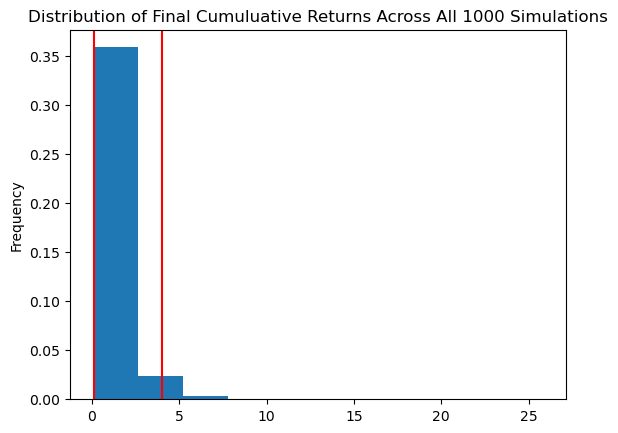

In [170]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [171]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.064951
std                1.338385
min                0.052645
25%                0.381273
50%                0.706709
75%                1.280891
max               25.872011
95% CI Lower       0.112058
95% CI Upper       4.034431
Name: 1260, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [175]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $2241.17 and $80688.63


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [176]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower2 = round(even_tbl[8]*initial_investment,2)
ci_upper2 = round(even_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $3361.75 and $121032.94
